In [65]:
import pandas as pd
from pyspark import SparkContext

In [97]:
# Convert parquet to .csv
df = spark.read.parquet("datasets_final_project/6month/airlines_pr_6m.parquet/*.parquet")
df.write.csv("datasets_final_project/6month/airlines_6m.csv")

names = ['origin',
                     'destination',
                     'year',
                     'month',
                     'day_of_month',
                     'day_of_week',
                     'crs_dep_time_utc',
                     'actual_dep_time_utc',
                     'op_carrier',
                     'dep_delay_new',
                     'dep_del15',
                     'taxi_out',
                     'air_time',
                     'landing_taxi_time',
                     'arr_delay_new',
                     'arr_del15',
                     'crs_arr_time_utc',
                     'actual_arr_time_utc',
                     'distance',
                     'distance_group',
                     'dep_blk_start',
                     'dep_blk_end',
                     'arr_blk_start',
                     'arr_blk_end',
                     'CARRIER_DELAY',
                     'WEATHER_DELAY',
                     'NAS_DELAY',
                     'SECURITY_DELAY',
                     'LATE_AIRCRAFT_DELAY',
                     'dest_pagerank',
                     'src_pagerank']
df = pd.read_csv("datasets_final_project/6month/airlines_6m.csv/part-00000-9da353a3-2ea0-4ea1-9cac-fbbde4b38d38-c000.csv",
           names = names)

csv_list = glob.glob("datasets_final_project/6month/airlines_6m.csv/*.csv")
for csv in csv_list:
    if "/part-00000-9da353a3-2ea0-4ea1-9cac-fbbde4b38d38-c000.csv" in csv:
        pass
    else:
        df_temp = pd.read_csv(csv, names = names)
        df = pd.concat([df, df_temp])

df.drop(0, inplace = True)

,origin,destination,year,month,day_of_month,day_of_week,crs_dep_time_utc,actual_dep_time_utc,op_carrier,dep_delay_new,...,dep_blk_end,arr_blk_start,arr_blk_end,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,dest_pagerank,src_pagerank
1,ATL,OAJ,2015.0,4.0,12.0,7.0,2015-04-12T20:13:00.000Z,2015-04-12T20:13:00.000Z,EV,0.0,...,1659.0,1700.0,1759.0,NaN,NaN,NaN,NaN,NaN,0.996399,0.99665
2,ATL,OAJ,2015.0,4.0,13.0,1.0,2015-04-13T20:13:00.000Z,2015-04-13T20:13:00.000Z,EV,0.0,...,1659.0,1700.0,1759.0,NaN,NaN,NaN,NaN,NaN,0.996399,0.99665
3,ATL,OAJ,2015.0,4.0,16.0,4.0,2015-04-16T20:13:00.000Z,2015-04-16T20:13:00.000Z,EV,4.0,...,1659.0,1700.0,1759.0,NaN,NaN,NaN,NaN,NaN,0.996399,0.99665
4,ATL,OAJ,2015.0,4.0,10.0,5.0,2015-04-10T20:13:00.000Z,2015-04-10T20:13:00.000Z,EV,26.0,...,1659.0,1700.0,1759.0,0.0,0.0,0.0,0.0,23.0,0.996399,0.99665
5,ATL,OAJ,2015.0,4.0,17.0,5.0,2015-04-17T20:13:00.000Z,2015-04-17T20:13:00.000Z,EV,0.0,...,1659.0,1700.0,1759.0,NaN,NaN,NaN,NaN,NaN,0.996399,0.99665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,ATL,TPA,2015.0,2.0,28.0,6.0,2015-02-28T13:50:00.000Z,2015-02-28T13:50:00.000Z,WN,0.0,...,859.0,1000.0,1059.0,NaN,NaN,NaN,NaN,NaN,1.001693,0.99665
5619,ATL,TPA,2015.0,2.0,28.0,6.0,2015-02-28T21:55:00.000Z,2015-02-28T21:55:00.000Z,WN,0.0,...,1659.0,1800.0,1859.0,NaN,NaN,NaN,NaN,NaN,1.001693,0.99665
5620,ATL,TPA,2015.0,2.0,28.0,6.0,2015-02-28T18:45:00.000Z,2015-02-28T18:45:00.000Z,WN,0.0,...,1359.0,1500.0,1559.0,NaN,NaN,NaN,NaN,NaN,1.001693,0.99665
5621,ATL,TPA,2015.0,2.0,28.0,6.0,2015-03-01T01:45:00.000Z,2015-03-01T01:45:00.000Z,WN,11.0,...,2059.0,2200.0,2259.0,NaN,NaN,NaN,NaN,NaN,1.001693,0.99665


In [98]:
# Add range column
df["date"] = df["day_of_month"].astype(int).astype(str) + "-" + df["month"].astype(int).astype(str) + "-" + df["year"].astype(int).astype(str)
grouped = df.groupby(["destination", "date"])["year"].count()
airport_range = grouped.groupby("destination").max() - grouped.groupby("destination").min()
df["range"] = [airport_range[airport] for airport in df["destination"]]
df = df[["destination", "range"]]
df.to_csv("datasets_final_project/6month/final_pagerank_w_range.csv")

,origin,destination,year,month,day_of_month,day_of_week,crs_dep_time_utc,actual_dep_time_utc,op_carrier,dep_delay_new,...,arr_blk_end,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,dest_pagerank,src_pagerank,date,range
1,ATL,OAJ,2015.0,4.0,12.0,7.0,2015-04-12T20:13:00.000Z,2015-04-12T20:13:00.000Z,EV,0.0,...,1759.0,NaN,NaN,NaN,NaN,NaN,0.996399,0.99665,12-4-2015,3
2,ATL,OAJ,2015.0,4.0,13.0,1.0,2015-04-13T20:13:00.000Z,2015-04-13T20:13:00.000Z,EV,0.0,...,1759.0,NaN,NaN,NaN,NaN,NaN,0.996399,0.99665,13-4-2015,3
3,ATL,OAJ,2015.0,4.0,16.0,4.0,2015-04-16T20:13:00.000Z,2015-04-16T20:13:00.000Z,EV,4.0,...,1759.0,NaN,NaN,NaN,NaN,NaN,0.996399,0.99665,16-4-2015,3
4,ATL,OAJ,2015.0,4.0,10.0,5.0,2015-04-10T20:13:00.000Z,2015-04-10T20:13:00.000Z,EV,26.0,...,1759.0,0.0,0.0,0.0,0.0,23.0,0.996399,0.99665,10-4-2015,3
5,ATL,OAJ,2015.0,4.0,17.0,5.0,2015-04-17T20:13:00.000Z,2015-04-17T20:13:00.000Z,EV,0.0,...,1759.0,NaN,NaN,NaN,NaN,NaN,0.996399,0.99665,17-4-2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,ATL,TPA,2015.0,2.0,28.0,6.0,2015-02-28T13:50:00.000Z,2015-02-28T13:50:00.000Z,WN,0.0,...,1059.0,NaN,NaN,NaN,NaN,NaN,1.001693,0.99665,28-2-2015,28
5619,ATL,TPA,2015.0,2.0,28.0,6.0,2015-02-28T21:55:00.000Z,2015-02-28T21:55:00.000Z,WN,0.0,...,1859.0,NaN,NaN,NaN,NaN,NaN,1.001693,0.99665,28-2-2015,28
5620,ATL,TPA,2015.0,2.0,28.0,6.0,2015-02-28T18:45:00.000Z,2015-02-28T18:45:00.000Z,WN,0.0,...,1559.0,NaN,NaN,NaN,NaN,NaN,1.001693,0.99665,28-2-2015,28
5621,ATL,TPA,2015.0,2.0,28.0,6.0,2015-03-01T01:45:00.000Z,2015-03-01T01:45:00.000Z,WN,11.0,...,2259.0,NaN,NaN,NaN,NaN,NaN,1.001693,0.99665,28-2-2015,28


In [92]:
# actual_pageranks.csv extracted form the main file 
df = pd.read_csv("actual_pageranks.csv")
location = pd.read_csv("datasets_final_project/airports.csv") # Kaggle dataset with lat and lon
df = df.merge(location, left_on = "origin", right_on =  "IATA")
ranges = pd.read_csv("datasets_final_project/6month/final_pagerank_w_range.csv") # Dataset with range
df = df.merge(ranges, left_on = "origin", right_on = "destination")
df = df[['origin', 'avg(src_pagerank)', 'avg(dest_pagerank)', 'avg(dep_del15)', 'LATITUDE', 'LONGITUDE', 'range']]
df.columns = ['origin', 'src_pagerank', 'dest_pagerank', 'avg_delay',
        'LATITUDE', 'LONGITUDE', 'range']
df.to_csv("tableau_final.csv") # Pull this into Tableau

,origin,src_pagerank,dest_pagerank,avg_delay,LATITUDE,LONGITUDE,range
0,ORD,10.191810,3.197076,0.230974,41.979595,-87.904464,14
1,ORD,10.191810,3.197076,0.230974,41.979595,-87.904464,14
2,ORD,10.191810,3.197076,0.230974,41.979595,-87.904464,14
3,ORD,10.191810,3.197076,0.230974,41.979595,-87.904464,14
4,ORD,10.191810,3.197076,0.230974,41.979595,-87.904464,14
...,...,...,...,...,...,...,...
48670,GTR,0.222347,9.031150,0.141176,33.450334,-88.591369,0
48671,GTR,0.222347,9.031150,0.141176,33.450334,-88.591369,0
48672,CSG,0.222347,9.031150,0.134555,32.516333,-84.938861,0
48673,CSG,0.222347,9.031150,0.134555,32.516333,-84.938861,0


# Steps inside Tableau:

### For the pagerank map:
1. Import the csv
2. Click "New Worksheet"
3. Double click "Latitude" and double click "logitue". Convert both from "average" to "dimension"
4. Double click "dep_del15" and format to show color. Change the color scaling to be visually pleasing. 
5. Double click "src_pagerank". Make sure it is displaying source by size.
6. Right click on the map and select "Map Layers". Remove "Country/Region Borders" and "Country/Region Name". Exit out of "Map Layers"
7. Double click "destination". Add it as label. 
8. Rename the legends and the map.

### For the ranges map:
Do everything the same except at step 4, choose "range" instead of "dep_del15"

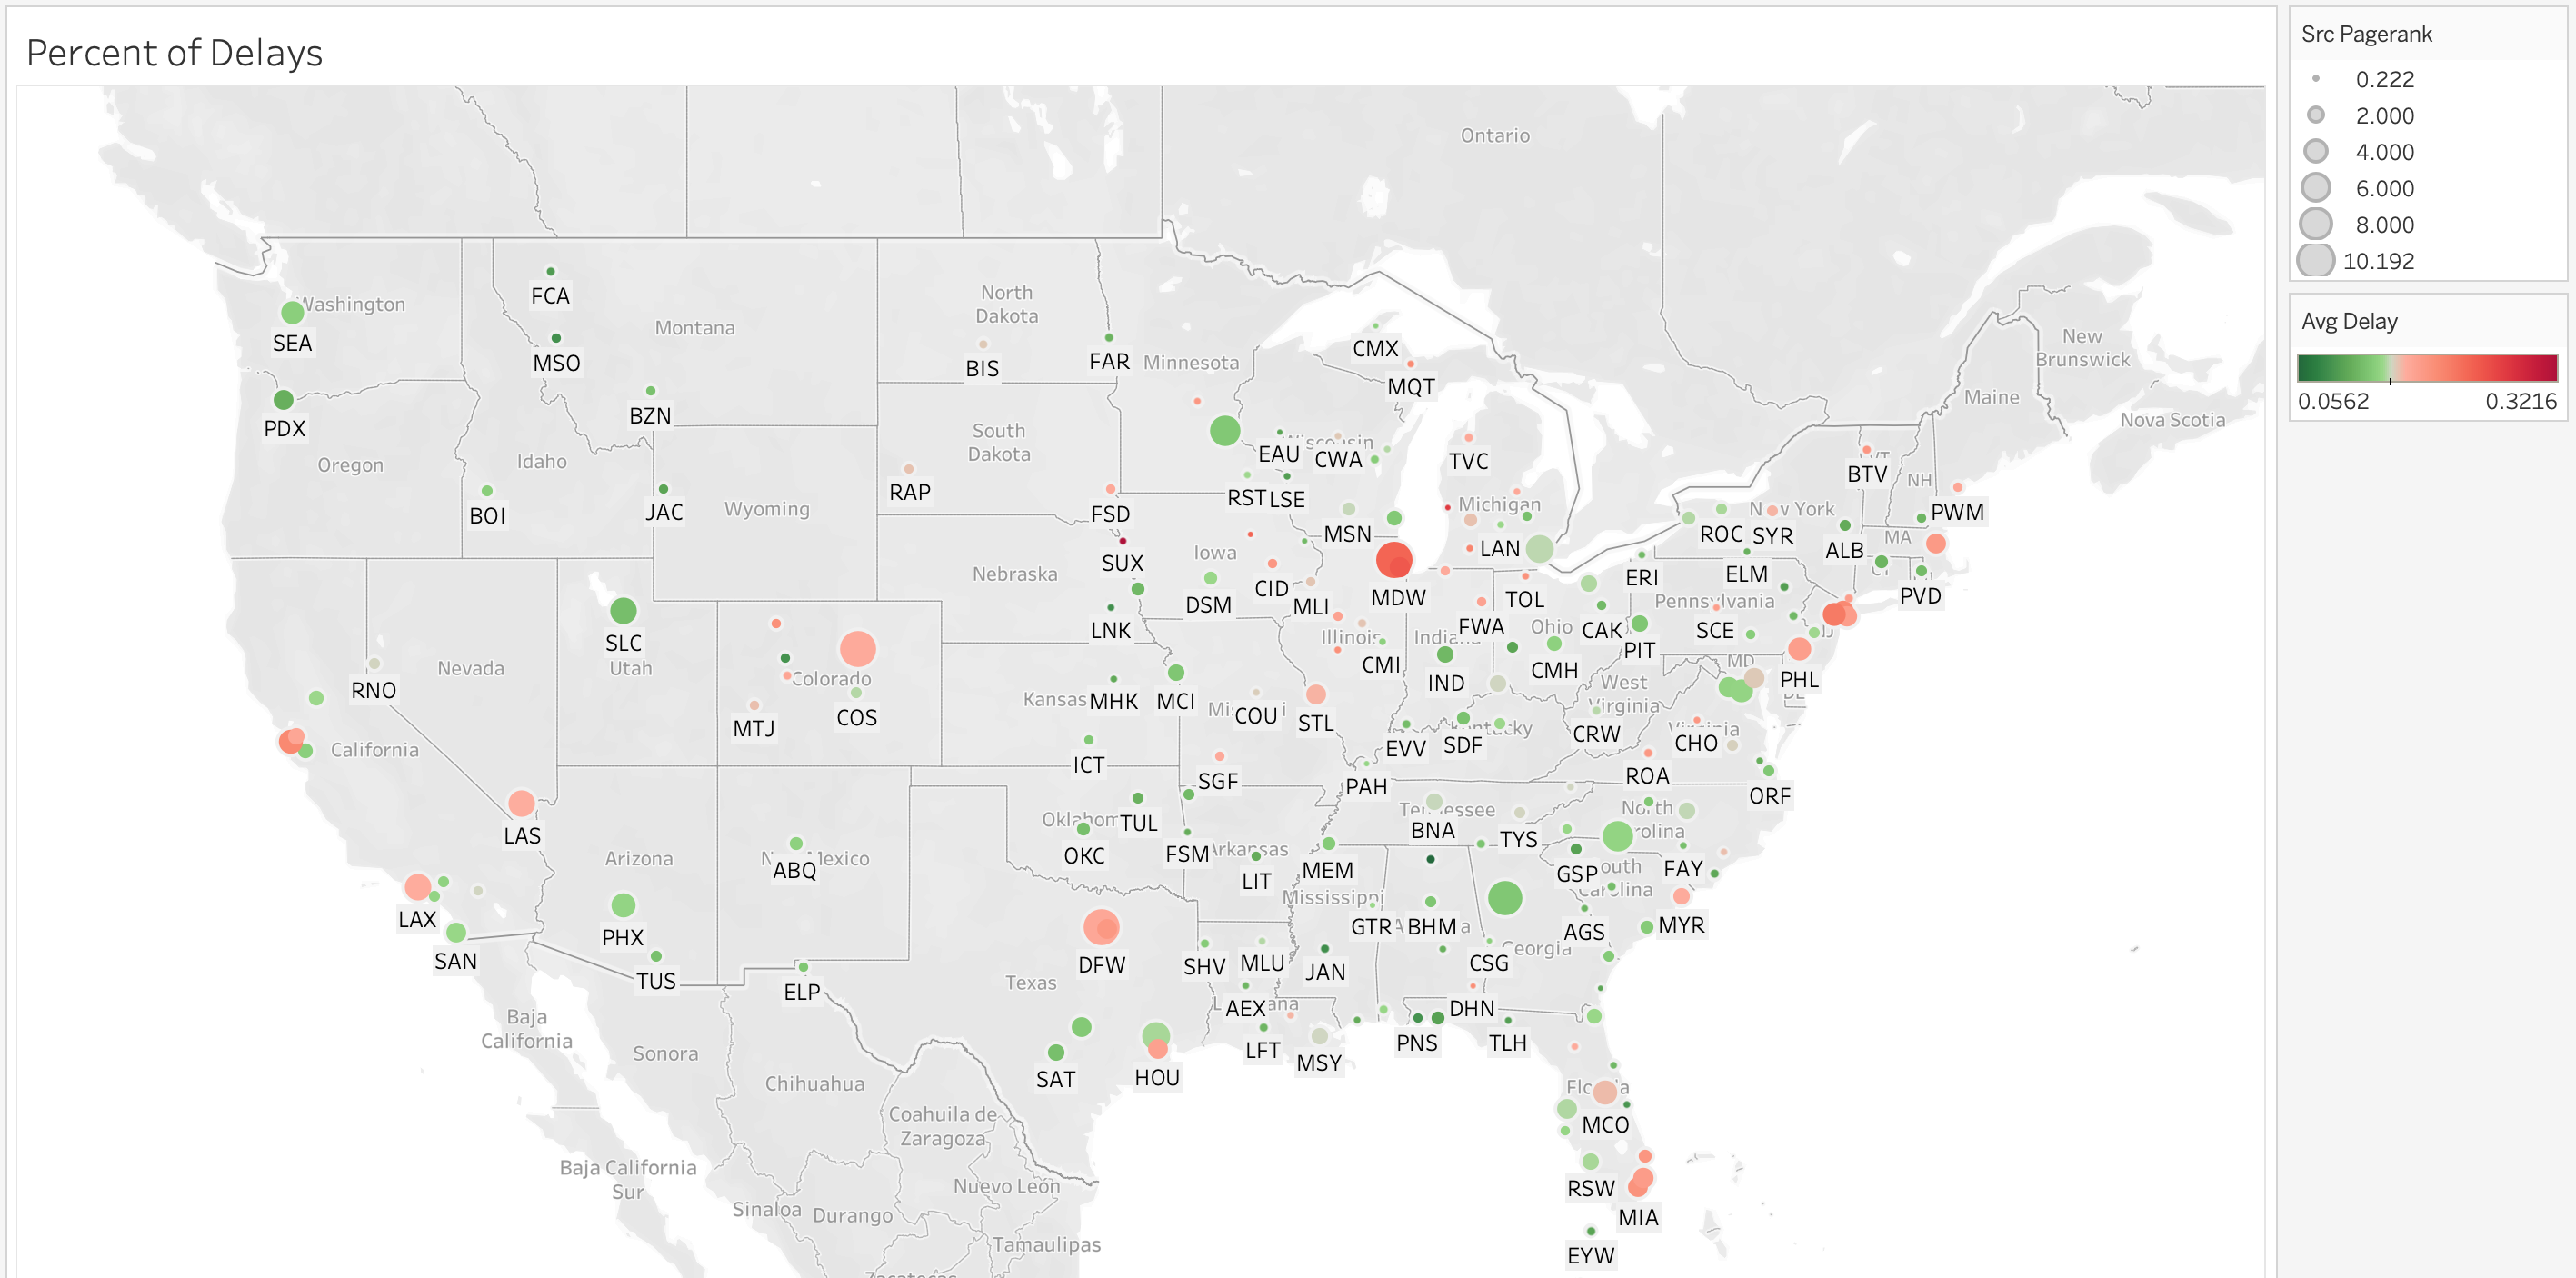
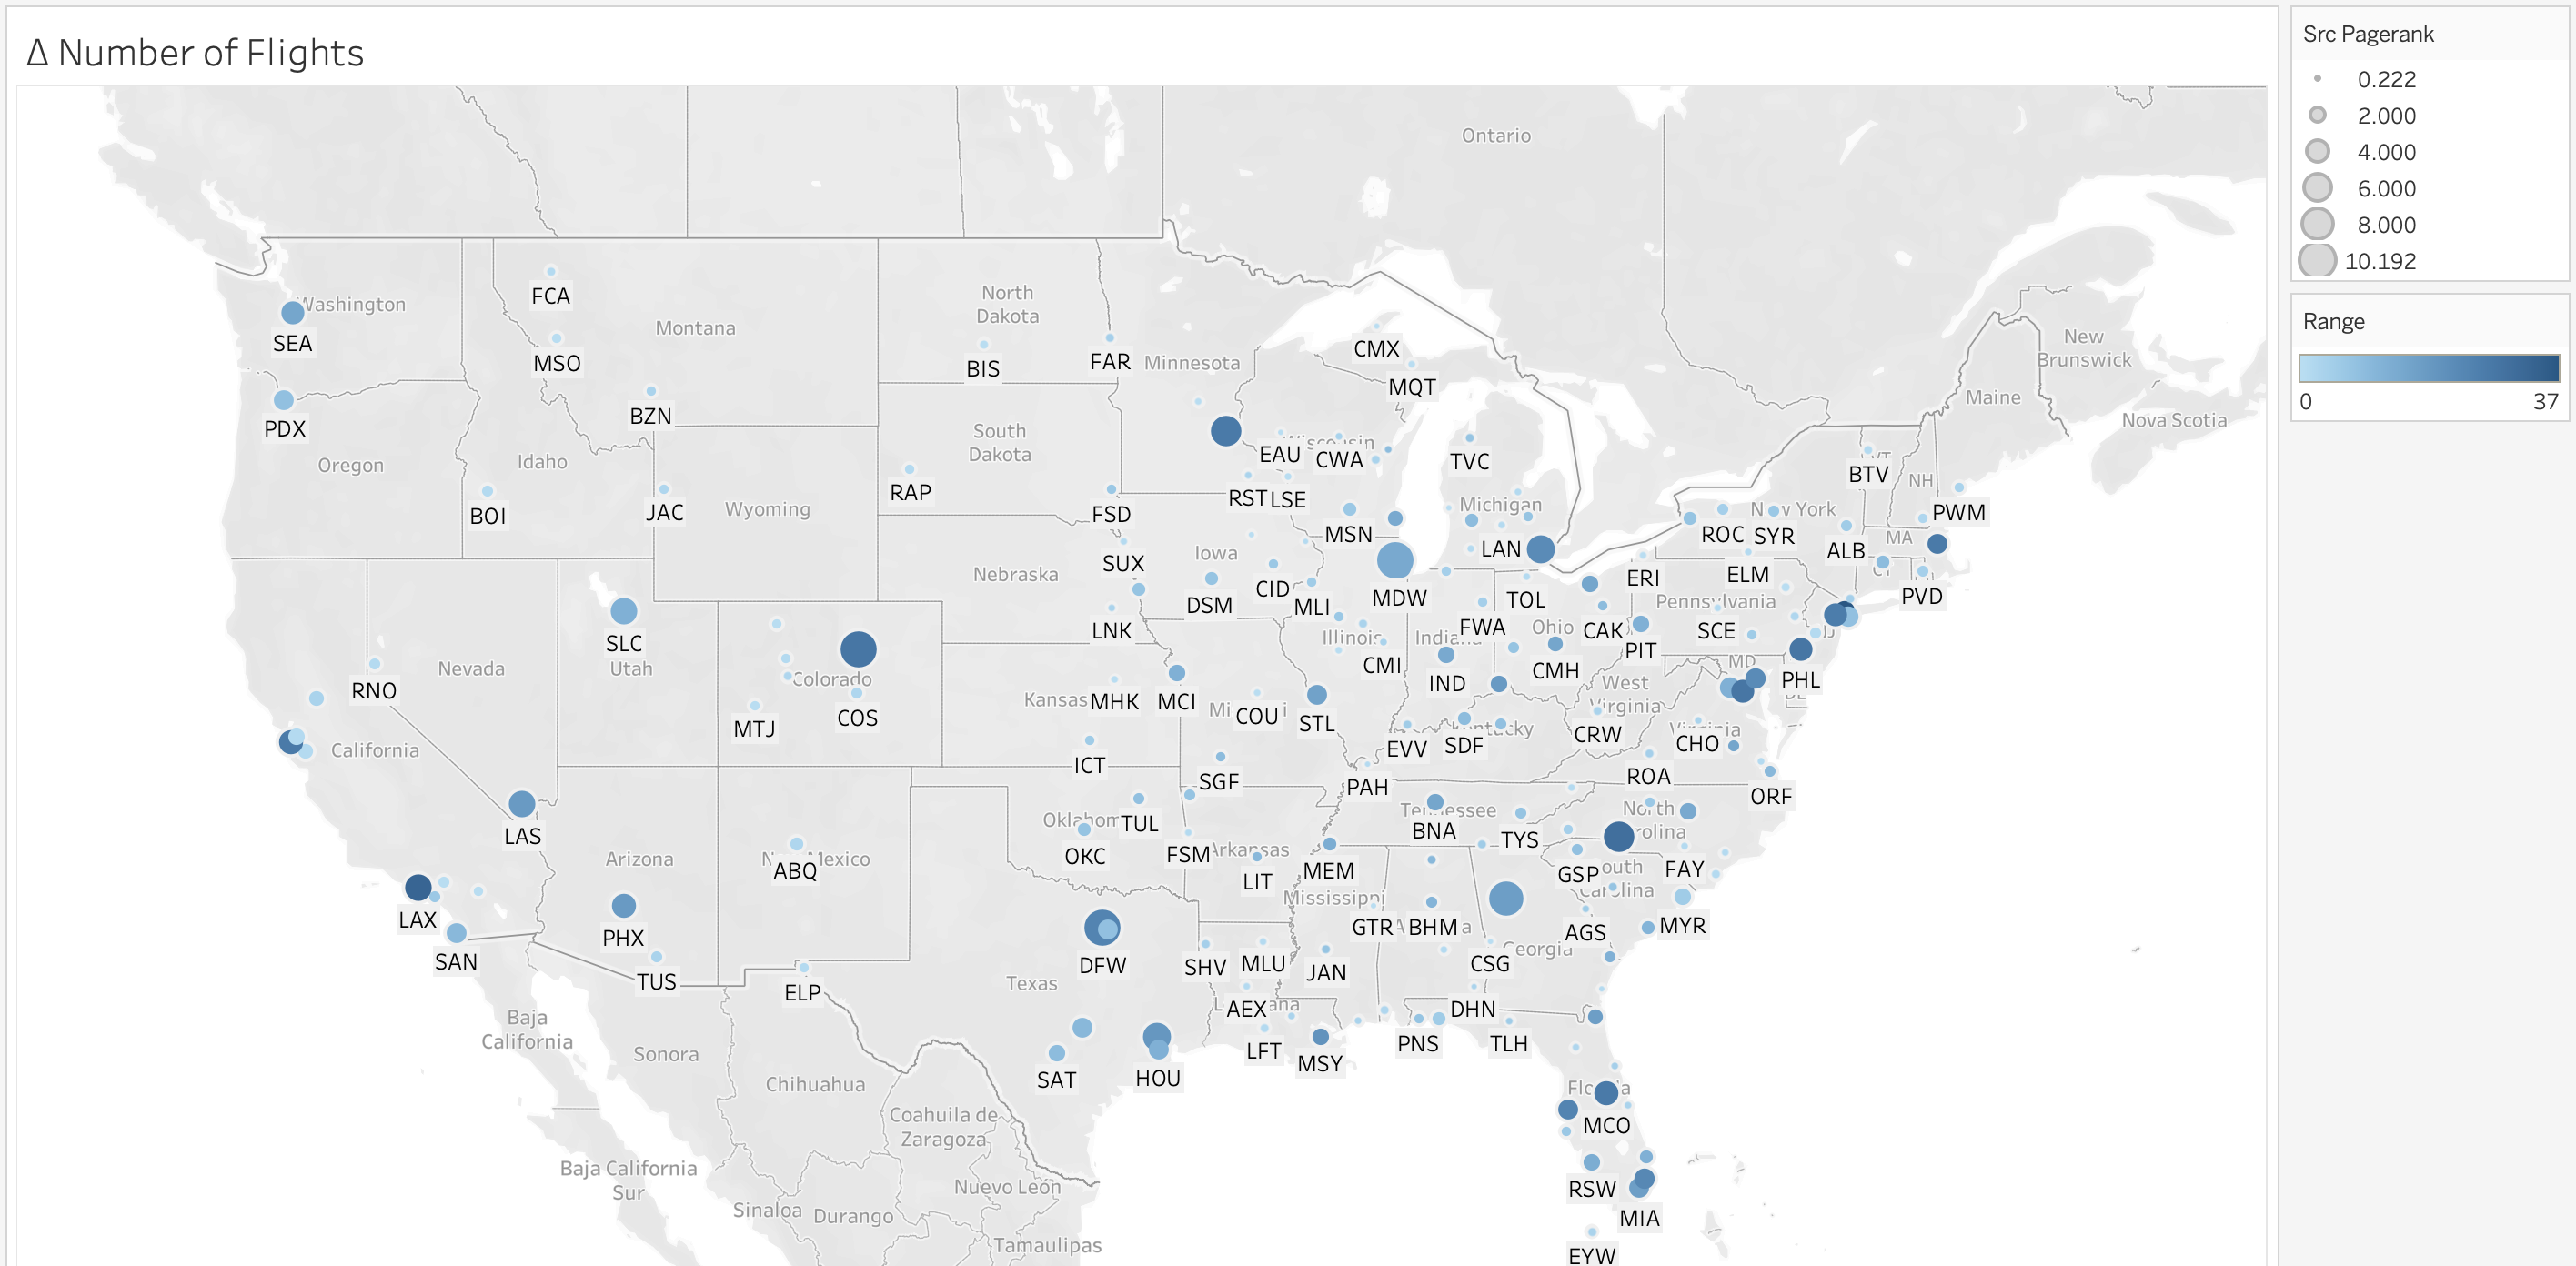